# ***KNN***
## Aprendizaje automático de máquina - Universidad del Rosario

## **Librerias**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entramar los datos
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score #usar las metricas de errores, para verificar que los datos estan bien
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph

from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

## **Importar el dataset**

In [29]:
data_ori=pd.read_csv('databases\heart_data.csv')
data=data_ori.copy()

## **Preprocesamiento de los datos**




In [30]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [31]:
data.nunique()

rest_bp             50
chest_pain           4
thalassemia          3
age                 41
fasting_bs           2
max_hr              91
exercise_angina      2
gender               2
st_slope             3
cholesterol        152
st_depression       40
rest_ecg             3
num_vessels          4
diagnosis            2
dtype: int64

In [32]:
data.isnull().sum() #Revisar la cantidad de datos nulos

rest_bp            0
chest_pain         0
thalassemia        0
age                0
fasting_bs         0
max_hr             0
exercise_angina    0
gender             0
st_slope           0
cholesterol        0
st_depression      0
rest_ecg           0
num_vessels        0
diagnosis          0
dtype: int64

## **Aplicación del algoritmo KNN**

### **Separación de los datos para la clasificación**

In [33]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=911)

In [35]:
#Estandarizar los datos
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### **Comparación entre KNN con datos escalados y sin escalar**

Se comparan los rendimientos entre la data escalada y la data sin escalar, aun que siempre se usa los datos escalados.

Se revisan los valores de K para que el modelo tenga un mejor rendimiento.

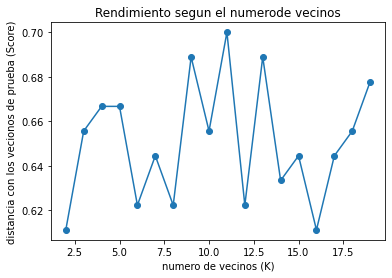

In [36]:
#sin escalar
dist = []

for i in range(2,20):
  kn_prueba = KNeighborsClassifier(n_neighbors=i)
  kn_prueba.fit(X_train, y_train)
  dist.append(kn_prueba.score(X_test, y_test))

plt.plot(range(2,20), dist, marker='o')
plt.title('Rendimiento segun el numerode vecinos')
plt.xlabel('numero de vecinos (K)')
plt.ylabel('distancia con los vecionos de prueba (Score)')
plt.show()

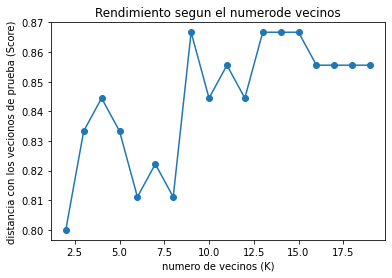

In [37]:
#escalada
dist = []

for i in range(2,20):
  kn_prueba = KNeighborsClassifier(n_neighbors=i)
  kn_prueba.fit(X_train_sc, y_train)
  dist.append(kn_prueba.score(X_test_sc, y_test))

plt.plot(range(2,20), dist, marker='o')
plt.title('Rendimiento segun el numerode vecinos')
plt.xlabel('numero de vecinos (K)')
plt.ylabel('distancia con los vecionos de prueba (Score)')
plt.show()

### **Creación del modelo**

In [38]:
#El mejor número de vecinos es 15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)

### **Reporte y métricas**

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        46
           1       0.94      0.77      0.85        44

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.88      0.87      0.87        90



In [40]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [41]:
print(confusion_matrix(y_test, y_pred))

[[44  2]
 [10 34]]


### **Graficas de verificación de los resultados y el modelo**

#### **Matriz de confusión**



*   Verdadero Positivo (TP): Los casos que el modelo ha clasificado correctamente como positivos.
*   Falso Negativo (FN): Los casos positivos que el modelo ha clasificado incorrectamente como negativos.
*   Falso Positivo (FP): Los casos negativos que el modelo ha clasificado incorrectamente como positivos.
*   Verdadero Negativo (TN): Los casos que el modelo ha clasificado correctamente como negativos.

Se desea que los TP y TN sean los más altos.

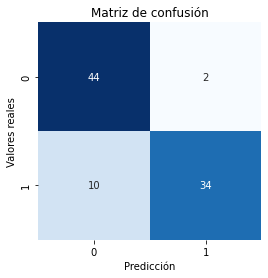

In [42]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

Con la matriz de confusion se puede determinar que el modelo tiene un buen rendimiento y clasifica correctamente:

- 44 verdaderos negativos (clase 0 bien predicha)

- 34 verdaderos positivos (clase 1 bien predicha)

pero comete:

- 2 falsos positivos (predijo 1 cuando era 0)

- 10 falsos negativos (predijo 0 cuando era 1)

Esto indica que el modelo se equivoca más al no detectar correctamente los positivos.

#### **Curva ROC**

La curva ROC representa la tasa de verdaderos positivos en el eje y y la tasa de falsos positivos en el eje x para diferentes umbrales de clasificación.

Nos dice que tan bueno es el modelo para distinguir entre dos clases.

* Sensibilidad (recall): Proporción de identificados correctamente con 1. $$sensibilidad=\frac{TP}{TP+FN}$$
* Especificidad: Proporción de identificados correctamente con 0. $$especificidad=\frac{TN}{TN+FP}$$

La curva ROC es la gráfica que relaciona 1-especificidad y la sensibilidad.

$AUC$ es el área bajo la curva ROC y nos dice el porcentaje para distinguir entre clases. Nunca se debe de aproximar a $0.5$.

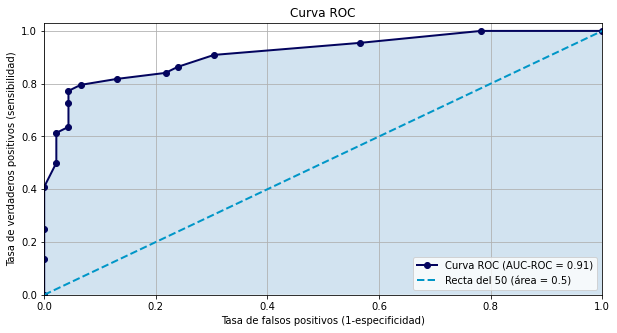

In [43]:
# Obtener las probabilidades de prediccion para la clase positiva
y_scores = knn.predict_proba(X_test_sc)[:, 1]

# Calcular la curva ROC y el area bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='#03045e', lw=2, label='Curva ROC (AUC-ROC = %0.2f)' % roc_auc, marker='o')
plt.fill_between(fpr, tpr, alpha=0.2)
plt.plot([0, 1], [0, 1], color='#0096c7', lw=2, linestyle='--', label='Recta del 50 (área = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('Tasa de falsos positivos (1-especificidad)')
plt.ylabel('Tasa de verdaderos positivos (sensibilidad)')
plt.title('Curva ROC')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

La curva ROC muestra que el modelo tiene una buena capacidad para distinguir entre clases y con un AUC de 0.91, esto indica un buen equilibrio entre sensibilidad y especificidad, con un 91% de probabilidad de que el modelo asigne a un positivo real que a un negativo y al ser diferente de 0.5 indica que no es aleatorio al clasificar.

#### **$F_{\beta}$ score**

El F $\beta$ score es una metrica que realiza un balance de importancia relativo determinado por el valir de $\beta$ entre la precision y el recall.

Cuando $\beta = 0$ solo se considera la precision. Cuando $\beta \to\infty$ se considere el recall.

Esto se puede entender como:

- Si $\beta < 1$, perdonas un poco los falsos negativos, pero penalizas mucho los falsos positivos.

- Si $\beta > 1$, perdonas un poco los falsos positivos, pero penalizas mucho los falsos negativos.

In [ ]:
# Valores de beta
betas = np.linspace(0, 2, 20)
#Matriz de confusión
mc = confusion_matrix(y_test, y_pred)

# Precisión y recall
precision = mc[0][0]/(mc[0][0] + mc[0][1])
recall = mc[0][0]/(mc[0][0] + mc[1][0])

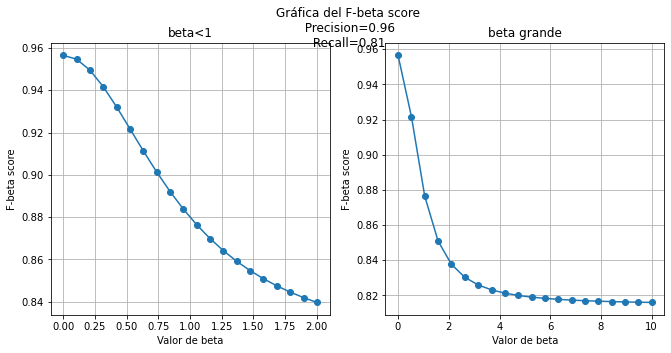

In [ ]:
plt.figure(figsize=(11, 5))
plt.suptitle(f'Gráfica del F-beta score\n Precision={precision:.2f}\n Recall={recall:.2f}')

#primera grafica
plt.subplot(1, 2, 1)
betas = np.linspace(0, 2, 20)

# Calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

# Graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores, marker='o')
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'beta<1')
plt.grid(True)

#segunda grafica
plt.subplot(1, 2, 2)
betas = np.linspace(0, 10, 20)

#calcular el F-beta score para cada valor de beta
f_beta_scores = [(1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall) for beta in betas]

#graficar el F-beta score en función de beta
plt.plot(betas, f_beta_scores, marker='o')
plt.xlabel('Valor de beta')
plt.ylabel('F-beta score')
plt.title(f'beta grande')
plt.grid(True)
plt.show()

Si consideramos un valor de 1 para beta, obtenemos que el F score es cercano a $0.88$ lo que indica que el modelo es muy bueno descriminando entre las clases.

#### **Diagrama de dispersión (por reducción de la dimensionalidad por t-SNE)**

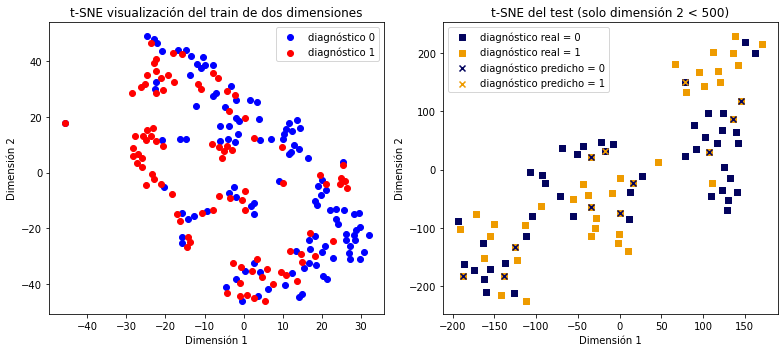

In [ ]:
per = 10

plt.figure(figsize=(11, 5))

#primera grafica
tsne = TSNE(n_components=2, random_state=911, perplexity=per)
X = X_train.values
X_tsne = tsne.fit_transform(X)

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[y_train == 0, 0], X_tsne[y_train == 0, 1], c='b', label='diagnóstico 0')
plt.scatter(X_tsne[y_train == 1, 0], X_tsne[y_train == 1, 1], c='r', label='diagnóstico 1')
plt.title('t-SNE visualización del train de dos dimensiones')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()

#segunda grafica
tsne = TSNE(n_components=2, random_state=911, perplexity=per)
X = X_test.values
X_tsne = tsne.fit_transform(X)

#se filtrar por segunda dimensión < 500 para que se vea mejor la grafica
filtro = X_tsne[:, 1] < 500
X_filtrado = X_tsne[filtro]
y_test_filtrado = y_test[filtro]
y_pred_filtrado = y_pred[filtro]

plt.subplot(1, 2, 2)
plt.scatter(X_filtrado[y_test_filtrado == 0, 0], X_filtrado[y_test_filtrado == 0, 1], c='#03045e', marker='s', label='diagnóstico real = 0')
plt.scatter(X_filtrado[y_test_filtrado == 1, 0], X_filtrado[y_test_filtrado == 1, 1], c='#ee9b00', marker='s', label='diagnóstico real = 1')
plt.scatter(X_filtrado[y_pred_filtrado == 0, 0], X_filtrado[y_pred_filtrado == 0, 1], c='#03045e', marker='x', label='diagnóstico predicho = 0')
plt.scatter(X_filtrado[y_pred_filtrado == 1, 0], X_filtrado[y_pred_filtrado == 1, 1], c='#ee9b00', marker='x', label='diagnóstico predicho = 1')
plt.title('t-SNE del test (solo dimensión 2 < 500)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()

#ajustar finales
plt.tight_layout()
plt.show()

En la grafica izquierda se muestra la distribucion (despues de una reduccion de dimension) de los datos que se usaron para entrenar y sus resultados, esto para poder visualizar la distribucion que siguen las clases.

En la derecha se muestra una comparacion entre los resultados del modelo y los resultados esperados, los valores erroneos estan representados con una X sobre un cuadrado de color diferente, lo que indica que hubo un error de prediccion, en este caso solo hay 12, por lo que el modelo tiene buen rendimiento para clasificar.

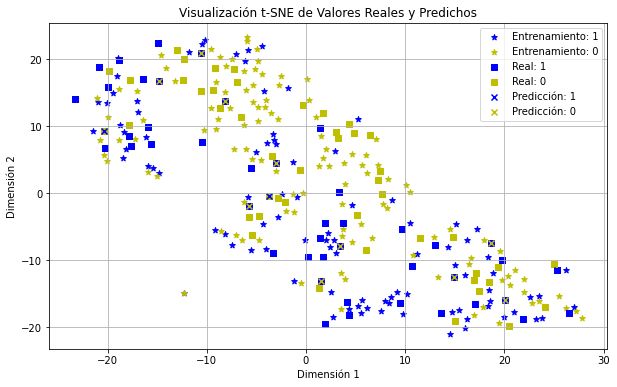

In [46]:
# Concatenar los datos de entrenamiento, prueba y predicción
X_all = np.vstack((X_train, X_test, X_test))
y_all = np.concatenate((y_train, y_test, y_pred))

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=911)
X_tsne = tsne.fit_transform(X_all)

# Separar los datos según el tipo (entrenamiento, prueba, predicción) y el valor de la etiqueta
X_train_1 = X_tsne[:len(X_train)][y_train == 1]
X_train_0 = X_tsne[:len(X_train)][y_train == 0]

X_test_1 = X_tsne[len(X_train):len(X_train) + len(X_test)][y_test == 1]
X_test_0 = X_tsne[len(X_train):len(X_train) + len(X_test)][y_test == 0]

X_pred_1 = X_tsne[len(X_train):len(X_train) + len(X_test)][y_pred == 1]
X_pred_0 = X_tsne[len(X_train):len(X_train) + len(X_test)][y_pred == 0]

# Graficar los puntos resultantes
plt.figure(figsize=(10, 6))

# Graficar los puntos de entrenamiento
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], color='b', marker='*', label='Entrenamiento: 1')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], color='y', marker='*', label='Entrenamiento: 0')

# Graficar los puntos de prueba
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], color='b', marker='s', label='Real: 1')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], color='y', marker='s', label='Real: 0')

# Graficar los puntos de predicción
plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], color='b', marker='x', label='Predicción: 1')
plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], color='y', marker='x', label='Predicción: 0')

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización t-SNE de Valores Reales y Predichos')
plt.legend()
plt.grid(True)
plt.show()